In [1]:
import numpy as np
import keras
import matplotlib.pyplot as plt

/usr/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


(60000, 28, 28)


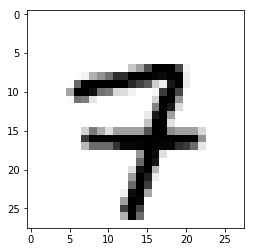

7


In [30]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
exampleindex = 324
digitimage = x_train[exampleindex]
digitlabel = y_train[exampleindex]

plt.imshow(digitimage, cmap=plt.cm.binary)
plt.show()
print(digitlabel)

In [29]:
print(x_train.shape)
x_train = x_train.reshape(-1, 28 * 28).astype('float32') / 255.0
x_vlak = x_train.ravel().astype("float32") / 255.0
x_test = x_test.reshape(-1, 28 * 28).astype('float32') / 255.0
print(x_train.shape, x_vlak.shape)

(60000, 784)
(60000, 784) (47040000,)


In [19]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(1, input_shape=(28 * 28,)))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1)                 785       
Total params: 785
Trainable params: 785
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(optimizer='sgd', loss='mse')

hist = model.fit(x_train, y_train, epochs=10, batch_size=64)

Epoch 1/10
60000/60000 [==============================] - 1s 12us/step - loss: 3.9180
Epoch 2/10
60000/60000 [==============================] - 1s 11us/step - loss: 3.4242
Epoch 3/10
60000/60000 [==============================] - 1s 10us/step - loss: 3.3612
Epoch 4/10
60000/60000 [==============================] - 1s 10us/step - loss: 3.3353
Epoch 5/10
60000/60000 [==============================] - 1s 10us/step - loss: 3.3272
Epoch 6/10
60000/60000 [==============================] - 1s 10us/step - loss: 3.3114
Epoch 7/10
60000/60000 [==============================] - 1s 10us/step - loss: 3.3061
Epoch 8/10
60000/60000 [==============================] - 1s 11us/step - loss: 3.3098
Epoch 9/10
60000/60000 [==============================] - 1s 11us/step - loss: 3.3009
Epoch 10/10
60000/60000 [==============================] - 1s 10us/step - loss: 3.3013


Epoch 1/10
60000/60000 [==============================] - 1s 12us/step - loss: 3.9310
Epoch 2/10
60000/60000 [==============================] - 1s 10us/step - loss: 3.4228
Epoch 3/10
60000/60000 [==============================] - 1s 11us/step - loss: 3.3609
Epoch 4/10
60000/60000 [==============================] - 1s 10us/step - loss: 3.3316
Epoch 5/10
60000/60000 [==============================] - 1s 11us/step - loss: 3.3214
Epoch 6/10
60000/60000 [==============================] - 1s 10us/step - loss: 3.3200
Epoch 7/10
60000/60000 [==============================] - 1s 10us/step - loss: 3.3167
Epoch 8/10
60000/60000 [==============================] - 1s 10us/step - loss: 3.3009
Epoch 9/10
60000/60000 [==============================] - 1s 10us/step - loss: 3.2965
Epoch 10/10
60000/60000 [==============================] - 1s 10us/step - loss: 3.3051


In [33]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17089675360376630337
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 4317162841969090934
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 17220118922156531515
physical_device_desc: "device: XLA_GPU device"
]


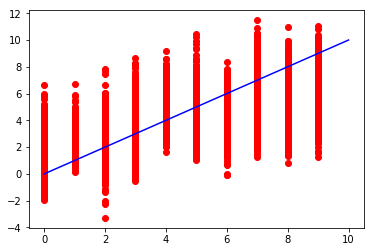

In [22]:
import matplotlib.pyplot as plt

plt.plot(y_test, preds, 'ro')
plt.plot([0,10], [0,10], 'b')
plt.show()

In [31]:
print(np.sum(np.round(preds[:,0]) == y_test) / len(y_test))
import tensorflow as tf
with tf.device('/gpu:0'):
    a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3], name='a')
    b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3, 2], name='b')
    c = tf.matmul(a, b)

with tf.Session() as sess:
    print (sess.run(c))

0.2336


InvalidArgumentError: Cannot assign a device for operation 'MatMul': Operation was explicitly assigned to /device:GPU:0 but available devices are [ /job:localhost/replica:0/task:0/device:CPU:0, /job:localhost/replica:0/task:0/device:XLA_CPU:0, /job:localhost/replica:0/task:0/device:XLA_GPU:0 ]. Make sure the device specification refers to a valid device.
	 [[Node: MatMul = MatMul[T=DT_FLOAT, transpose_a=false, transpose_b=false, _device="/device:GPU:0"](a, b)]]

Caused by op 'MatMul', defined at:
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/usr/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/usr/lib/python3.6/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/usr/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/usr/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/usr/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/usr/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/usr/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/usr/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/usr/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/usr/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/usr/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2728, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/usr/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2850, in run_ast_nodes
    if self.run_code(code, result):
  File "/usr/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-31-b8c2b791e377>", line 6, in <module>
    c = tf.matmul(a, b)
  File "/usr/lib/python3.6/site-packages/tensorflow/python/ops/math_ops.py", line 1891, in matmul
    a, b, transpose_a=transpose_a, transpose_b=transpose_b, name=name)
  File "/usr/lib/python3.6/site-packages/tensorflow/python/ops/gen_math_ops.py", line 2437, in _mat_mul
    name=name)
  File "/usr/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/usr/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 2956, in create_op
    op_def=op_def)
  File "/usr/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1470, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): Cannot assign a device for operation 'MatMul': Operation was explicitly assigned to /device:GPU:0 but available devices are [ /job:localhost/replica:0/task:0/device:CPU:0, /job:localhost/replica:0/task:0/device:XLA_CPU:0, /job:localhost/replica:0/task:0/device:XLA_GPU:0 ]. Make sure the device specification refers to a valid device.
	 [[Node: MatMul = MatMul[T=DT_FLOAT, transpose_a=false, transpose_b=false, _device="/device:GPU:0"](a, b)]]


0.2196
